# Downloading Meme Templates using Selenium

Let's say you have to build an AI meme generator. Firstly you need to download a LOT of memes.

Here are a few meme ids that are used by the ImgFlip API.

[Imgflip](https://api.imgflip.com/popular_meme_ids)

Imgflip's provides us with the following API.
URL: https://api.imgflip.com/get_memes

Method: GET

Calling an API of a website is the fastest way to retrieve web data - Since the developers of the website have already taken care of everything for us.

But, ofcourse there is a catch. These API's are usually paid. There is a limit on the number of queries you can make to these endpoints based on your payment plan. 

Imgflip has a free version.

https://api.imgflip.com/

In [1]:
import requests
response = requests.get('https://api.imgflip.com/get_memes')
data = response.json()
data

{'success': True,
 'data': {'memes': [{'id': '181913649',
    'name': 'Drake Hotline Bling',
    'url': 'https://i.imgflip.com/30b1gx.jpg',
    'width': 1200,
    'height': 1200,
    'box_count': 2},
   {'id': '112126428',
    'name': 'Distracted Boyfriend',
    'url': 'https://i.imgflip.com/1ur9b0.jpg',
    'width': 1200,
    'height': 800,
    'box_count': 3},
   {'id': '87743020',
    'name': 'Two Buttons',
    'url': 'https://i.imgflip.com/1g8my4.jpg',
    'width': 600,
    'height': 908,
    'box_count': 2},
   {'id': '129242436',
    'name': 'Change My Mind',
    'url': 'https://i.imgflip.com/24y43o.jpg',
    'width': 482,
    'height': 361,
    'box_count': 2},
   {'id': '131087935',
    'name': 'Running Away Balloon',
    'url': 'https://i.imgflip.com/261o3j.jpg',
    'width': 761,
    'height': 1024,
    'box_count': 5},
   {'id': '102156234',
    'name': 'Mocking Spongebob',
    'url': 'https://i.imgflip.com/1otk96.jpg',
    'width': 502,
    'height': 353,
    'box_count': 2

In [2]:
MEME_IDS = [ '114585149',
             '438680',
             '100777631',
             '181913649',
             '161865971',
             '217743513',
             '131087935',
             '119139145',
             '93895088',
             '112126428',
             '97984',
             '1035805',
             '155067746',
             '4087833',
             '91538330',
             '124822590',
             '178591752',
             '124055727',
             '87743020',
             '222403160',
             '102156234',
             '188390779',
             '89370399',
             '129242436']

# Using Selenium for Web Automation

We will use Selenium and ChromeDriver for downloading the memes. Selenium just mimics human behavior as if you are browsing the web. 

Apart from Web Automation, Selenium is also used in automated testing and robotic process automation (RPA).


[More here](https://realpython.com/modern-web-automation-with-python-and-selenium/)

In [3]:
import os
import time

from selenium.webdriver.chrome.webdriver import WebDriver
from selenium.webdriver.chrome.options import Options

In [4]:
print(os.getcwd())
try:
    os.mkdir('Downloads')
except FileExistsError:
    print('Directory already exists...')

download_directory = os.path.join(os.getcwd(),'Downloads')
download_directory

/home/manpreet/Desktop/Web-Data-Integration-Lecture-ACM-CSS
Directory already exists...


'/home/manpreet/Desktop/Web-Data-Integration-Lecture-ACM-CSS/Downloads'

In [5]:
options = Options()
options.add_argument('--start-maximized')

In [6]:
try:
    # No need to specify executable_path if you are using windows 
    # and chromedriver.exe is in the current working directory.
    
    driver = WebDriver(executable_path='./chromedriver',options=options)
    driver.get('https://www.google.co.in')
    time.sleep(10)
except Exception as err:
    print(err)
finally:
    driver.quit()

In [16]:
meme = MEME_IDS[2]

In [17]:
# No need to specify executable_path if you are using windows 
# and chromedriver.exe is in the current working directory.
driver = WebDriver(executable_path='./chromedriver',options=options)
driver.get('https://www.google.co.in')

In [18]:
search_bar = driver.find_element_by_xpath('//*[@id="tsf"]/div[2]/div[1]/div[1]/div/div[2]/input')

In [19]:
search_bar.send_keys(f'meme id {meme}')

In [20]:
search_button = driver.find_element_by_xpath('//*[@id="tsf"]/div[2]/div[1]/div[2]/div[2]/div[2]/center/input[1]')

In [21]:
search_button.click()
time.sleep(2)

In [22]:
search_results = driver.find_elements_by_xpath('//*[@id="rso"]/div/div/div[1]/a')

In [23]:
url = ''
for i in search_results:
    if 'meme template' in i.text.lower():
        url = i.get_attribute('href')
        break
url

'https://imgflip.com/memetemplate/Is-This-A-Pigeon'

In [ ]:
driver.get(url)

img = driver.find_element_by_xpath('//*[@id="mtm-img"]')

response = requests.get(img.get_attribute('src'))

with open(os.path.join(download_directory,f'{meme}.jpg'), 'wb') as file:
    file.write(response.content)



driver.quit()

In [27]:
os.listdir(download_directory)

['114585149.jpg', '100777631.jpg']

In [26]:
meme

'100777631'

In [ ]:
response = requests.get(img.get_attribute('src'))

with open(os.path.join(download_directory,f'{meme}.jpg'), 'wb') as file:
    file.write(response.content)

driver.quit()

In [30]:
path_of_file_downloaded = '/100777631.jpg'

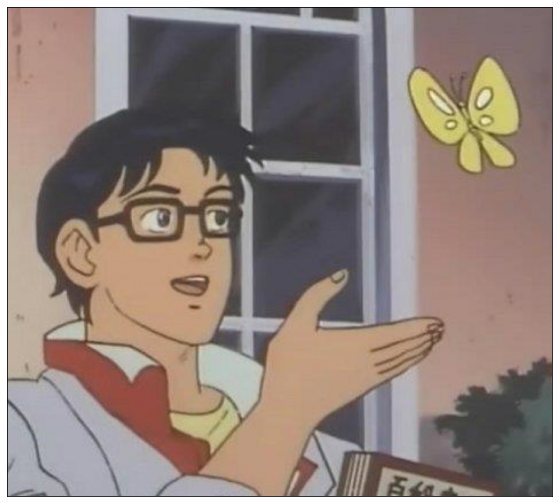

In [31]:
import cv2 
from matplotlib import pyplot as plt
%matplotlib inline

img = cv2.imread(download_directory + path_of_file_downloaded)
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(12,9))
plt.imshow(rgb)
plt.tick_params(
    axis='both',
    which='both',      
    bottom=False,
    left=False,
    top=False,
    labelleft=False,
    labelbottom=False)
plt.show()